In [175]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.utils import resample
from sklearn.datasets import fetch_california_housing
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from joblib import dump
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor



In [141]:
##

In [142]:
## Load dataset
california_housing=fetch_california_housing()
print(california_housing.DESCR)



.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [143]:
##Convert dataset into pandaDataframe
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [144]:
California_dataset=pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
California_dataset['Price']=california_housing.target
California_dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### Visualization and correlation

In [145]:
correlation=California_dataset.corr()
correlation

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


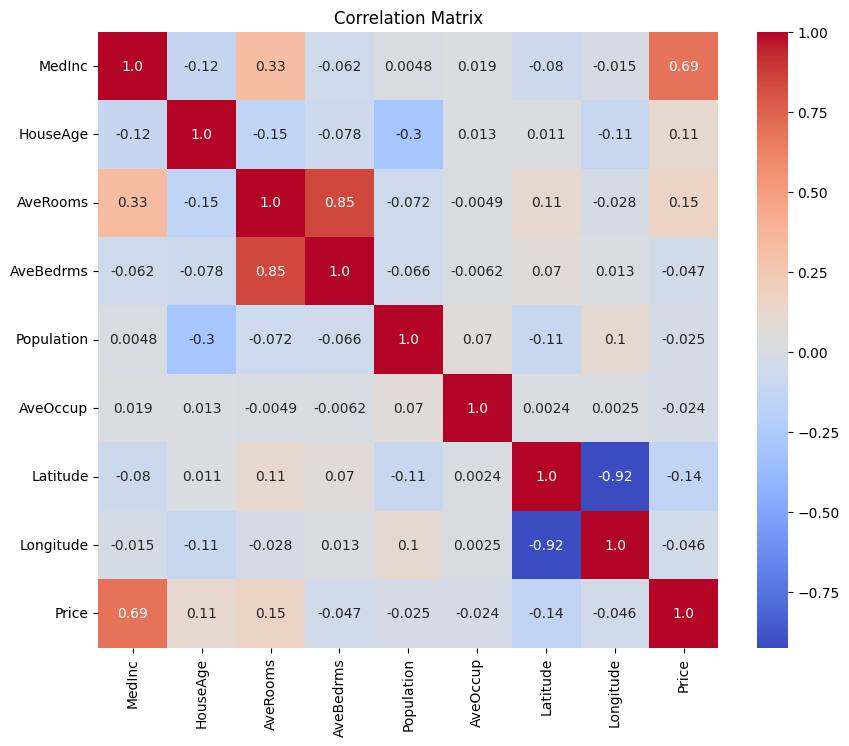

In [146]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, fmt=".2", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [147]:
## Check multi-collinearity
X = add_constant(California_dataset)  # Adds a constant term to the predictor
VIFs = pd.Series([variance_inflation_factor(X.values, i) 
                  for i in range(X.shape[1])], 
                 index=X.columns)
print(VIFs)

const         19685.429049
MedInc            3.813979
HouseAge          1.268150
AveRooms          8.477254
AveBedrms         7.173226
Population        1.138164
AveOccup          1.011274
Latitude         10.842087
Longitude        10.407641
Price             2.539571
dtype: float64


There is a lot of collinearity between features. I need to do some feature engineering

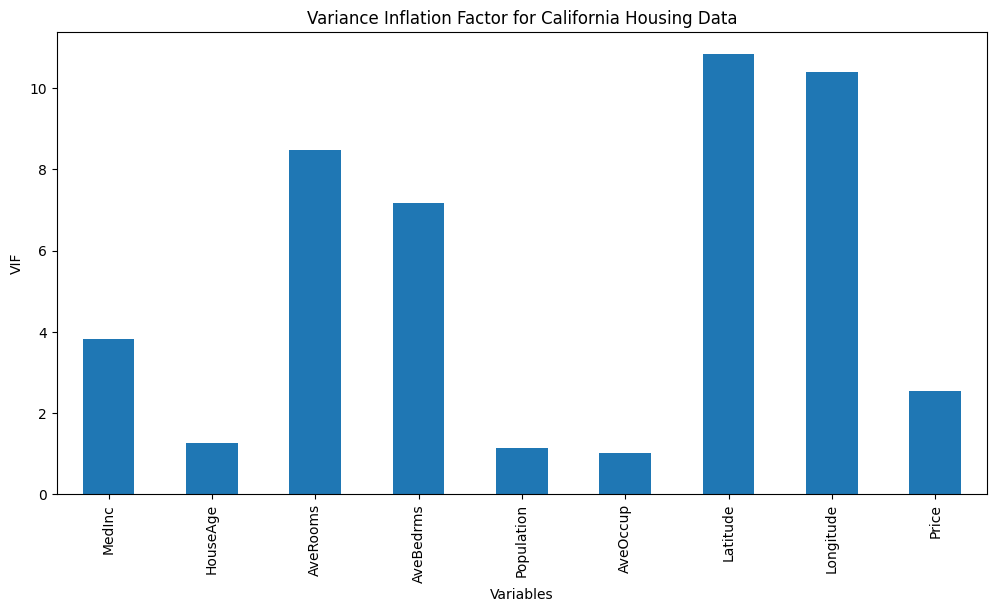

In [148]:
X = add_constant(California_dataset)  
# Calculating VIF for each feature
VIFs = pd.Series([variance_inflation_factor(X.values, i) 
                  for i in range(X.shape[1])], index=X.columns)

# Plotting the VIF results
plt.figure(figsize=(12, 6))
VIFs.drop('const').plot(kind='bar')  # Dropping the 'const' as it's not a feature but a model artifact
plt.title('Variance Inflation Factor for California Housing Data')
plt.xlabel('Variables')
plt.ylabel('VIF')
plt.show()

#### Feature Engineering

In [149]:
# # replace Average rooms and average bedrooms by rooms per bedrooms 
California_dataset['RoomsPerBedroom'] = California_dataset['AveRooms'] / California_dataset['AveBedrms']
California_dataset.drop(columns=['AveRooms', 'AveBedrms'], inplace=True)


In [150]:
important_cities = {
    'Los Angeles': {'lat': 34.0522, 'lon': -118.2437},
    'San Francisco': {'lat': 37.7749, 'lon': -122.4194},
    'San Diego': {'lat': 32.7157, 'lon': -117.1611},
    'San Jose': {'lat': 37.3382, 'lon': -121.8863},
    'Palo Alto': {'lat': 37.4419, 'lon': -122.1430},
    'Santa Barbara': {'lat': 34.4208, 'lon': -119.6982},
    'Malibu': {'lat': 34.0259, 'lon': -118.7798},
    'Cupertino': {'lat': 37.3220, 'lon': -122.0322},
    'Santa Monica': {'lat': 34.0195, 'lon': -118.4912},
    'Berkeley': {'lat': 37.8715, 'lon': -122.2730},
    'Newport Beach': {'lat': 33.6189, 'lon': -117.9298},
    'Mill Valley': {'lat': 37.9060, 'lon': -122.5449},
    'Carmel-by-the-Sea': {'lat': 36.5552, 'lon': -121.9233}
}


In [151]:
max(California_dataset['MedInc'])

15.0001

## Models

##### Ridge Regression

In [152]:
## Split the dataset into training and test sets
training_dataset, test_dataset=train_test_split(California_dataset, test_size=0.2, random_state=42)
X_train=training_dataset.drop(columns=['Price'])
y_train=training_dataset['Price']
X_test=test_dataset.drop(columns=['Price'])
y_test=test_dataset['Price']
ridge_model=Ridge(alpha=1.0)
ridge_model.fit(X_train,y_train)
y_predict=ridge_model.predict(X_test)

##Evaluate the model
mse=mean_squared_error(y_test,y_predict)
print(f"Mean squared error:{mse}")


Mean squared error:0.5336223885425095


##### Lasso and Elastic net Regression

In [153]:
# Prepare data
X = California_dataset.drop('Price', axis=1)
y = California_dataset['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
print("Lasso MSE:", mean_squared_error(y_test, y_pred_lasso))

# Elastic Net Regression
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net_model.fit(X_train, y_train)
y_pred_enet = elastic_net_model.predict(X_test)
print("Elastic Net MSE:", mean_squared_error(y_test, y_pred_enet))


Lasso MSE: 0.610934801982036
Elastic Net MSE: 0.5607441644915239


In [154]:

## Lasso CV
lasso_scores = cross_val_score(lasso_model, X, y, cv=10, scoring='neg_mean_squared_error')
print("Lasso CV MSE scores:", -lasso_scores)
print("Average Lasso CV MSE:", -lasso_scores.mean())


Lasso CV MSE scores: [0.36419707 0.6194035  0.99929756 0.37148389 0.8676915  0.53012835
 0.46172106 0.94023381 0.96075188 0.40403261]
Average Lasso CV MSE: 0.6518941230949584


In [155]:
ridge_model.feature_names_in_

array(['MedInc', 'HouseAge', 'Population', 'AveOccup', 'Latitude',
       'Longitude', 'RoomsPerBedroom'], dtype=object)

Ridge MSE: 0.4051761054234617
Elastic Net MSE: 0.5159861577233052
Lasso MSE: 0.584411655945056
Decision Tree MSE: 0.2511045639000763


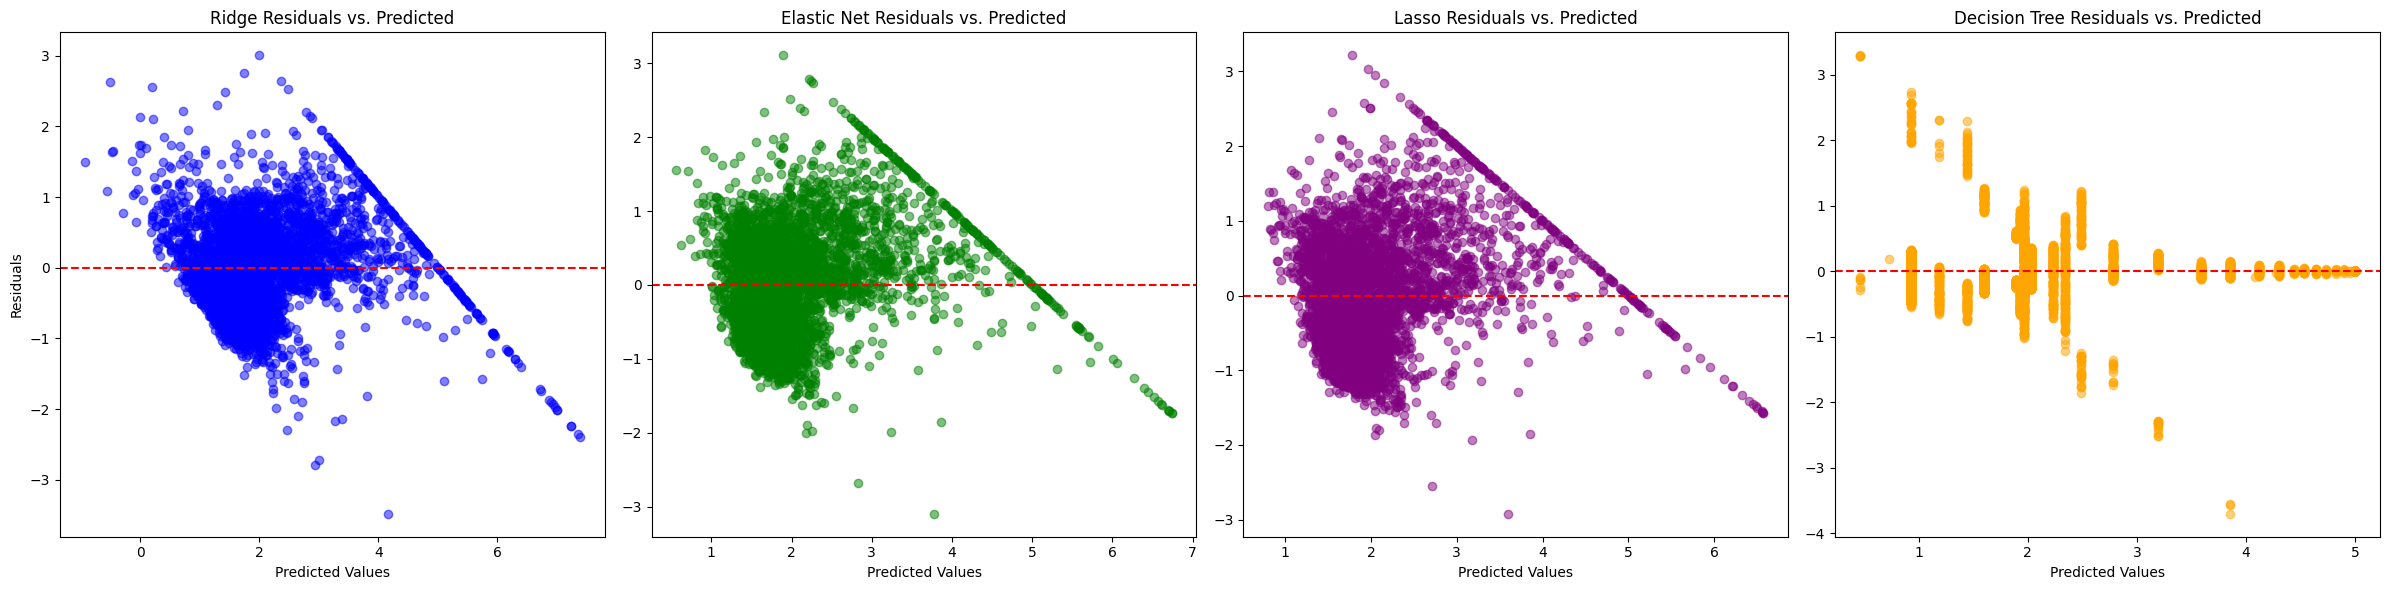

In [176]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Assume California_dataset is already loaded and is a DataFrame
X = California_dataset.drop('Price', axis=1)
y = California_dataset['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
ridge_model = Ridge(alpha=0.1)
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
lasso_model = Lasso(alpha=0.1)
decision_tree_model = DecisionTreeRegressor(max_depth=5)  # Decision Tree Regressor

# Fit models
ridge_model.fit(X_train_scaled, y_train)
elastic_net_model.fit(X_train_scaled, y_train)
lasso_model.fit(X_train_scaled, y_train)
decision_tree_model.fit(X_train_scaled, y_train)  # Fit Decision Tree

# Make predictions
ridge_pred = ridge_model.predict(X_test_scaled)
elastic_net_pred = elastic_net_model.predict(X_test_scaled)
lasso_pred = lasso_model.predict(X_test_scaled)
dt_pred = decision_tree_model.predict(X_test_scaled)  # Predict with Decision Tree

# Calculate residuals
ridge_residuals = y_test - ridge_pred
elastic_net_residuals = y_test - elastic_net_pred
lasso_residuals = y_test - lasso_pred
dt_residuals = y_test - dt_pred  # Calculate Decision Tree residuals

# MSE
ridge_mse = mean_squared_error(y_test, ridge_pred)
elastic_net_mse = mean_squared_error(y_test, elastic_net_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)
dt_mse = mean_squared_error(y_test, dt_pred)  # Decision Tree MSE

print(f"Ridge MSE: {ridge_mse}")
print(f"Elastic Net MSE: {elastic_net_mse}")
print(f"Lasso MSE: {lasso_mse}")
print(f"Decision Tree MSE: {dt_mse}")  # Print Decision Tree MSE

# Plotting residuals
plt.figure(figsize=(24, 6))
plt.subplot(1, 4, 1)
plt.scatter(ridge_pred, ridge_residuals, color='blue', alpha=0.5, label='Ridge Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Ridge Residuals vs. Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.subplot(1, 4, 2)
plt.scatter(elastic_net_pred, elastic_net_residuals, color='green', alpha=0.5, label='Elastic Net Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Elastic Net Residuals vs. Predicted')
plt.xlabel('Predicted Values')

plt.subplot(1, 4, 3)
plt.scatter(lasso_pred, lasso_residuals, color='purple', alpha=0.5, label='Lasso Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Lasso Residuals vs. Predicted')
plt.xlabel('Predicted Values')

plt.subplot(1, 4, 4)
plt.scatter(dt_pred, dt_residuals, color='orange', alpha=0.5, label='Decision Tree Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Decision Tree Residuals vs. Predicted')
plt.xlabel('Predicted Values')

plt.tight_layout()
plt.show()


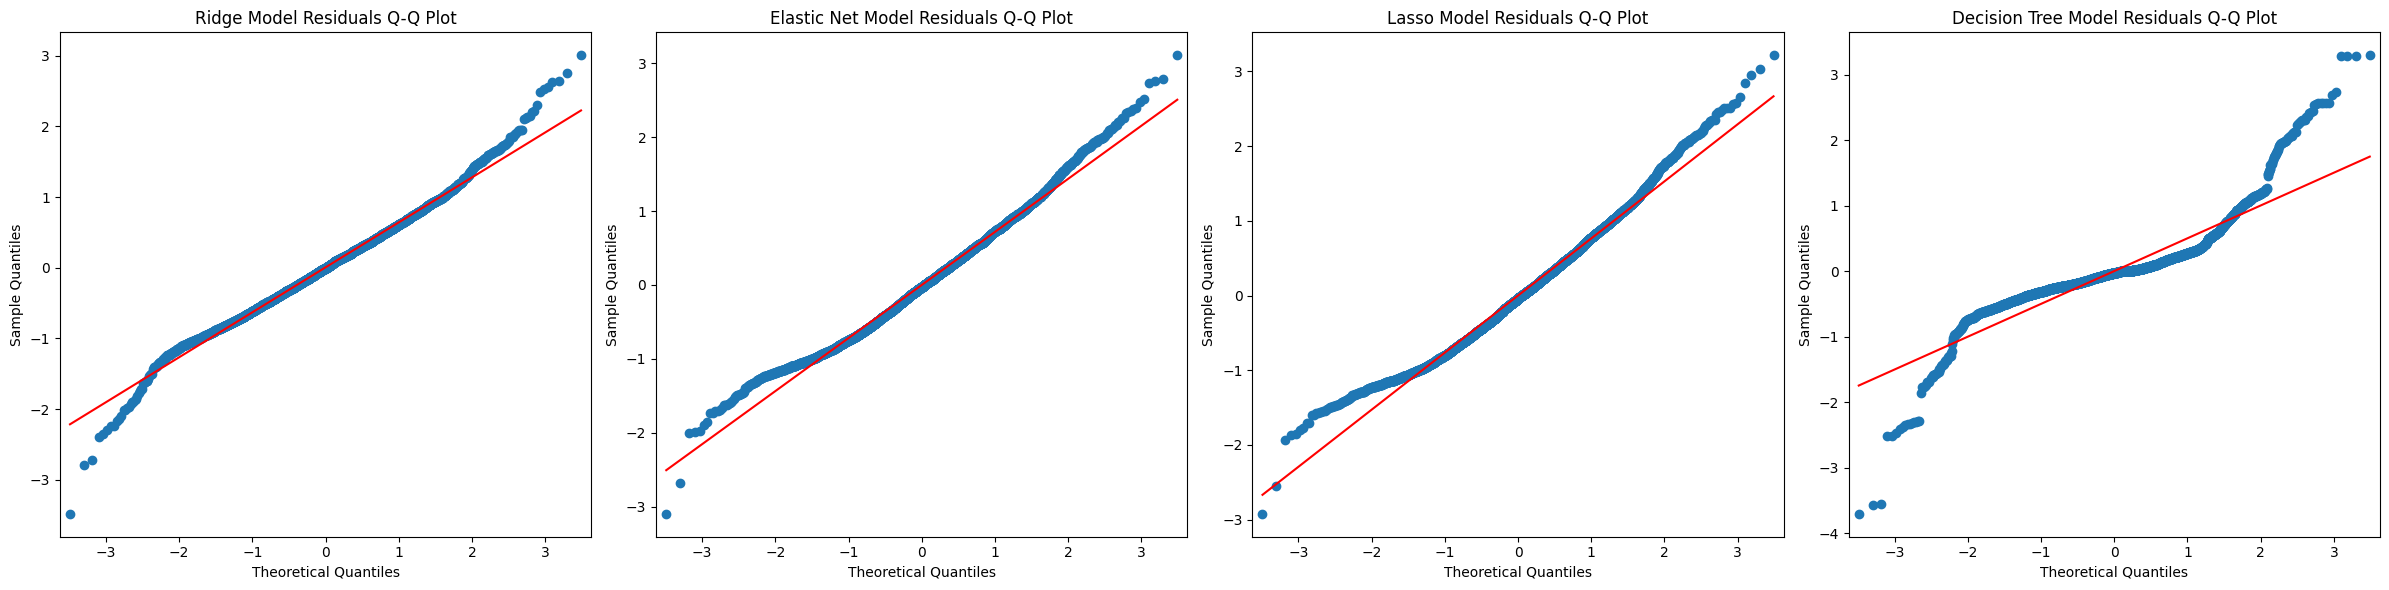

In [177]:
# Plotting Q-Q Plots
fig, axes = plt.subplots(1, 4, figsize=(24, 6))  # Adjust subplot grid for additional plot

# Ridge Residuals Q-Q Plot
sm.qqplot(ridge_residuals, line='s', ax=axes[0])
axes[0].set_title('Ridge Model Residuals Q-Q Plot')
axes[0].set_xlabel('Theoretical Quantiles')
axes[0].set_ylabel('Sample Quantiles')

# Elastic Net Residuals Q-Q Plot
sm.qqplot(elastic_net_residuals, line='s', ax=axes[1])
axes[1].set_title('Elastic Net Model Residuals Q-Q Plot')
axes[1].set_xlabel('Theoretical Quantiles')

# Lasso Residuals Q-Q Plot
sm.qqplot(lasso_residuals, line='s', ax=axes[2])
axes[2].set_title('Lasso Model Residuals Q-Q Plot')
axes[2].set_xlabel('Theoretical Quantiles')

# Decision Tree Residuals Q-Q Plot
sm.qqplot(dt_residuals, line='s', ax=axes[3])
axes[3].set_title('Decision Tree Model Residuals Q-Q Plot')
axes[3].set_xlabel('Theoretical Quantiles')

plt.tight_layout()
plt.show()

In [173]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Assuming 'X' and 'y' are your predictors and target variable from the California housing dataset

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# You might not need to standardize data for Decision Trees, but keeping it can help maintain consistency
# with other model implementations
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fitting the Decision Tree Regression model
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)  # Limiting the depth of the tree to prevent overfitting
tree_model.fit(X_train_scaled, y_train)

# Predicting values using the trained model
y_pred = tree_model.predict(X_test_scaled)

# Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error for the Decision Tree Regression: {mse:.4f}")


Mean Squared Error for the Decision Tree Regression: 0.2432


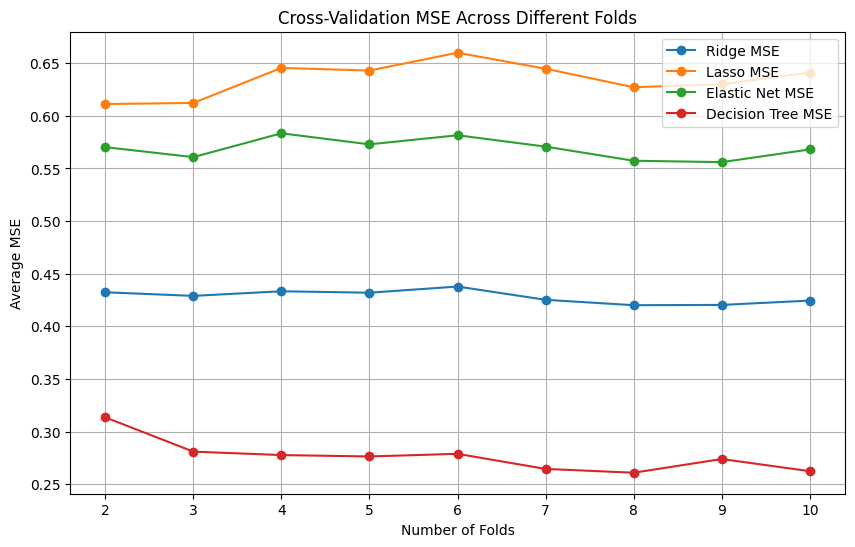

In [174]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer, mean_squared_error

# Load and prepare the dataset
X = California_dataset.drop('Price', axis=1)
y = California_dataset['Price']

# Define models
ridge_model = Ridge(alpha=0.1)
lasso_model = Lasso(alpha=0.1)
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
decision_tree_model = DecisionTreeRegressor(max_depth=5)  # Decision Tree with controlled depth

# MSE scorer
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Number of folds
folds = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# Store average MSEs for each model
ridge_mses = []
lasso_mses = []
elastic_net_mses = []
dt_mses = []  # Store MSEs for Decision Tree Regression

# Calculate MSEs for each fold count
for cv in folds:
    ridge_pipeline = make_pipeline(StandardScaler(), ridge_model)
    lasso_pipeline = make_pipeline(StandardScaler(), lasso_model)
    elastic_net_pipeline = make_pipeline(StandardScaler(), elastic_net_model)
    dt_pipeline = make_pipeline(StandardScaler(), decision_tree_model)  # Decision Tree pipeline

    # Perform cross-validation
    ridge_score = cross_val_score(ridge_pipeline, X, y, cv=cv, scoring=mse_scorer)
    lasso_score = cross_val_score(lasso_pipeline, X, y, cv=cv, scoring=mse_scorer)
    elastic_net_score = cross_val_score(elastic_net_pipeline, X, y, cv=cv, scoring=mse_scorer)
    dt_score = cross_val_score(dt_pipeline, X, y, cv=cv, scoring=mse_scorer)  # Decision Tree scoring

    # Append averaged negative scores (converted to positive)
    ridge_mses.append(-np.mean(ridge_score))
    lasso_mses.append(-np.mean(lasso_score))
    elastic_net_mses.append(-np.mean(elastic_net_score))
    dt_mses.append(-np.mean(dt_score))  # Append Decision Tree MSE

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(folds, ridge_mses, marker='o', label='Ridge MSE')
plt.plot(folds, lasso_mses, marker='o', label='Lasso MSE')
plt.plot(folds, elastic_net_mses, marker='o', label='Elastic Net MSE')
plt.plot(folds, dt_mses, marker='o', label='Decision Tree MSE')  # Plot Decision Tree MSE

plt.title('Cross-Validation MSE Across Different Folds')
plt.xlabel('Number of Folds')
plt.ylabel('Average MSE')
plt.legend()
plt.grid(True)
plt.show()


In [160]:


# Assume California_dataset is loaded as 'df'
# X = California_dataset.drop('Price', axis=1)
# y = np.log1p(California_dataset['Price'])  # Apply log1p transformation to normalize the target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train models
ridge_model = make_pipeline(StandardScaler(), Ridge(alpha=0.1))
lasso_model = make_pipeline(StandardScaler(), Lasso(alpha=0.1))
elastic_net_model = make_pipeline(StandardScaler(), ElasticNet(alpha=0.1, l1_ratio=0.5))

ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
elastic_net_model.fit(X_train, y_train)

# Evaluate models
print("Ridge Training Score:", ridge_model.score(X_train, y_train))
print("Lasso Training Score:", lasso_model.score(X_train, y_train))
print("ElasticNet Training Score:", elastic_net_model.score(X_train, y_train))


Ridge Training Score: 0.6129878944657774
Lasso Training Score: 0.4974185516409556
ElasticNet Training Score: 0.5386409300220201


In [161]:
from scipy import stats

# Assuming 'df' is your DataFrame with the 'Price' column
California_dataset['Z_Score'] = np.abs(stats.zscore(California_dataset['Price']))
cleaned_df = California_dataset[California_dataset['Z_Score'] < 3]  # Keep only rows with a Z-score less than 3

# Redefine X and y without outliers
X = cleaned_df.drop(['Price', 'Z_Score'], axis=1)
y = np.log1p(cleaned_df['Price'])  # Using log transformation

# Continue as before with train-test split and model fitting


#### We will use lasso regression


In [162]:
## Saving scikit-learn model
dump(ridge_model, 'ridge_model.joblib')

['ridge_model.joblib']

Ridge MSE (log-transformed): 0.9671839262931796
Elastic Net MSE (log-transformed): 0.8828325311847981
Lasso MSE (log-transformed): 0.8577958368556886


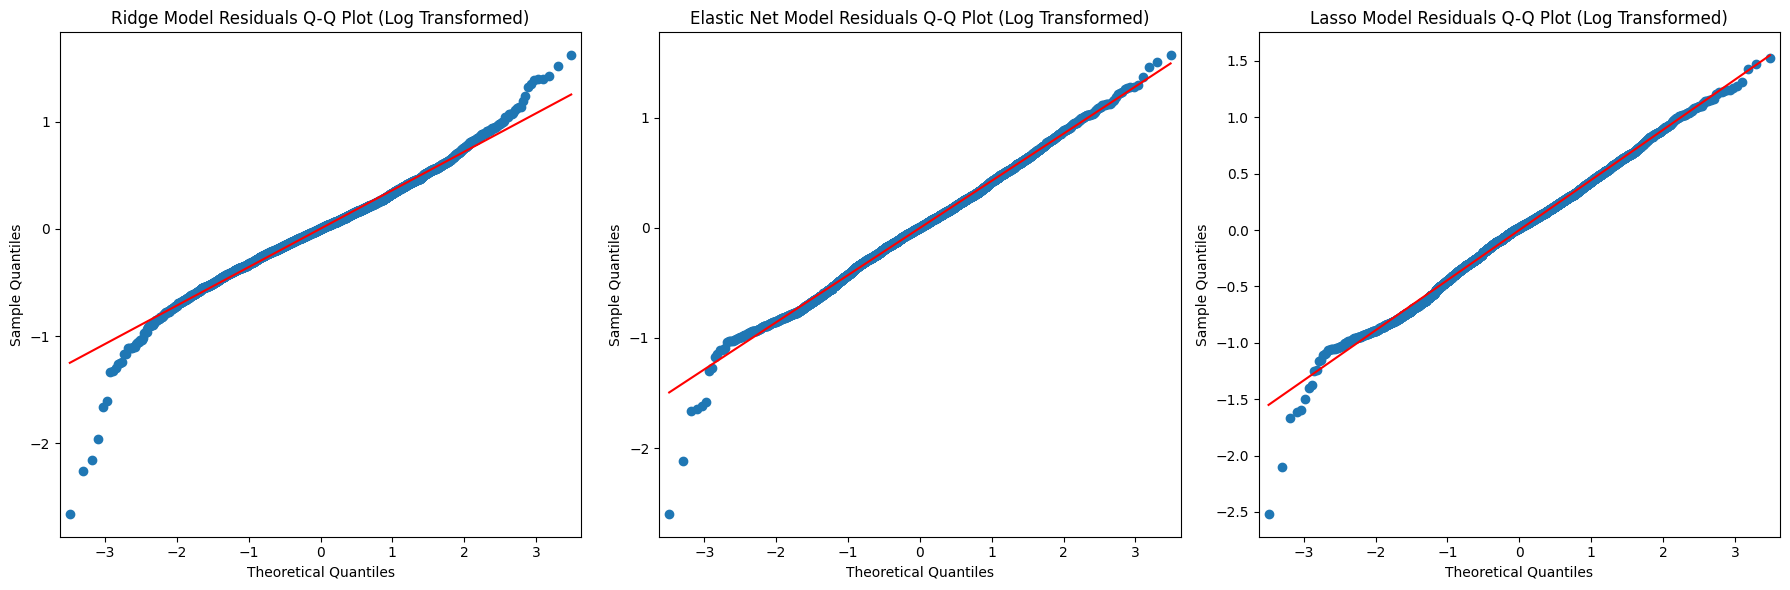

In [184]:
# Load and prepare the dataset
X = California_dataset.drop('Price', axis=1)
y = California_dataset['Price']

# Apply log transformation to the target variable
y_log = np.log(y)

# Split the data
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
ridge_model = Ridge(alpha=0.1)
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
lasso_model = Lasso(alpha=0.1)

# Create a pipeline and fit models on the transformed target
ridge_pipeline = make_pipeline(StandardScaler(), Ridge(alpha=0.1))
elastic_net_pipeline = make_pipeline(StandardScaler(), ElasticNet(alpha=0.1, l1_ratio=0.5))
lasso_pipeline = make_pipeline(StandardScaler(), Lasso(alpha=0.1))

ridge_pipeline.fit(X_train_scaled, y_train_log)
elastic_net_pipeline.fit(X_train_scaled, y_train_log)
lasso_pipeline.fit(X_train_scaled, y_train_log)

# Make predictions
ridge_pred_log = ridge_pipeline.predict(X_test_scaled)
elastic_net_pred_log = elastic_net_pipeline.predict(X_test_scaled)
lasso_pred_log = lasso_pipeline.predict(X_test_scaled)

# Calculate residuals
ridge_residuals_log = y_test_log - ridge_pred_log
elastic_net_residuals_log = y_test_log - elastic_net_pred_log
lasso_residuals_log = y_test_log - lasso_pred_log

# Calculate Mean Squared Error on the original scale
ridge_mse_log = mean_squared_error(np.exp(y_test_log), np.exp(ridge_pred_log))
elastic_net_mse_log = mean_squared_error(np.exp(y_test_log), np.exp(elastic_net_pred_log))
lasso_mse_log = mean_squared_error(np.exp(y_test_log), np.exp(lasso_pred_log))

print(f"Ridge MSE (log-transformed): {ridge_mse_log}")
print(f"Elastic Net MSE (log-transformed): {elastic_net_mse_log}")
print(f"Lasso MSE (log-transformed): {lasso_mse_log}")

# Plotting residuals for log-transformed models
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Ridge Residuals Q-Q Plot (log-transformed)
sm.qqplot(ridge_residuals_log, line='s', ax=axes[0])
axes[0].set_title('Ridge Model Residuals Q-Q Plot (Log Transformed)')
axes[0].set_xlabel('Theoretical Quantiles')
axes[0].set_ylabel('Sample Quantiles')

# Elastic Net Residuals Q-Q Plot (log-transformed)
sm.qqplot(elastic_net_residuals_log, line='s', ax=axes[1])
axes[1].set_title('Elastic Net Model Residuals Q-Q Plot (Log Transformed)')
axes[1].set_xlabel('Theoretical Quantiles')

# Lasso Residuals Q-Q Plot (log-transformed)
sm.qqplot(lasso_residuals_log, line='s', ax=axes[2])
axes[2].set_title('Lasso Model Residuals Q-Q Plot (Log Transformed)')
axes[2].set_xlabel('Theoretical Quantiles')

plt.tight_layout()
plt.show()

In [181]:
# Load and prepare the dataset
X = California_dataset.drop('Price', axis=1)
y = California_dataset['Price']

# Combine into a single DataFrame
data = pd.concat([X, y], axis=1)

# Identifying outliers using IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data_clean = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Separate features and target variable after outlier removal
X_clean = data_clean.drop('Price', axis=1)
y_clean = data_clean['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit models
ridge_model = Ridge(alpha=0.1)
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
lasso_model = Lasso(alpha=0.1)

ridge_model.fit(X_train_scaled, y_train)
elastic_net_model.fit(X_train_scaled, y_train)
lasso_model.fit(X_train_scaled, y_train)

# Predict and calculate MSE
ridge_pred = ridge_model.predict(X_test_scaled)
elastic_net_pred = elastic_net_model.predict(X_test_scaled)
lasso_pred = lasso_model.predict(X_test_scaled)

ridge_mse = mean_squared_error(y_test, ridge_pred)
elastic_net_mse = mean_squared_error(y_test, elastic_net_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

# Display new MSE results
print(f"Ridge MSE (no outliers): {ridge_mse}")
print(f"Elastic Net MSE (no outliers): {elastic_net_mse}")
print(f"Lasso MSE (no outliers): {lasso_mse}")

Ridge MSE (no outliers): 0.3016179221213043
Elastic Net MSE (no outliers): 0.40429202369576867
Lasso MSE (no outliers): 0.4692949683224221


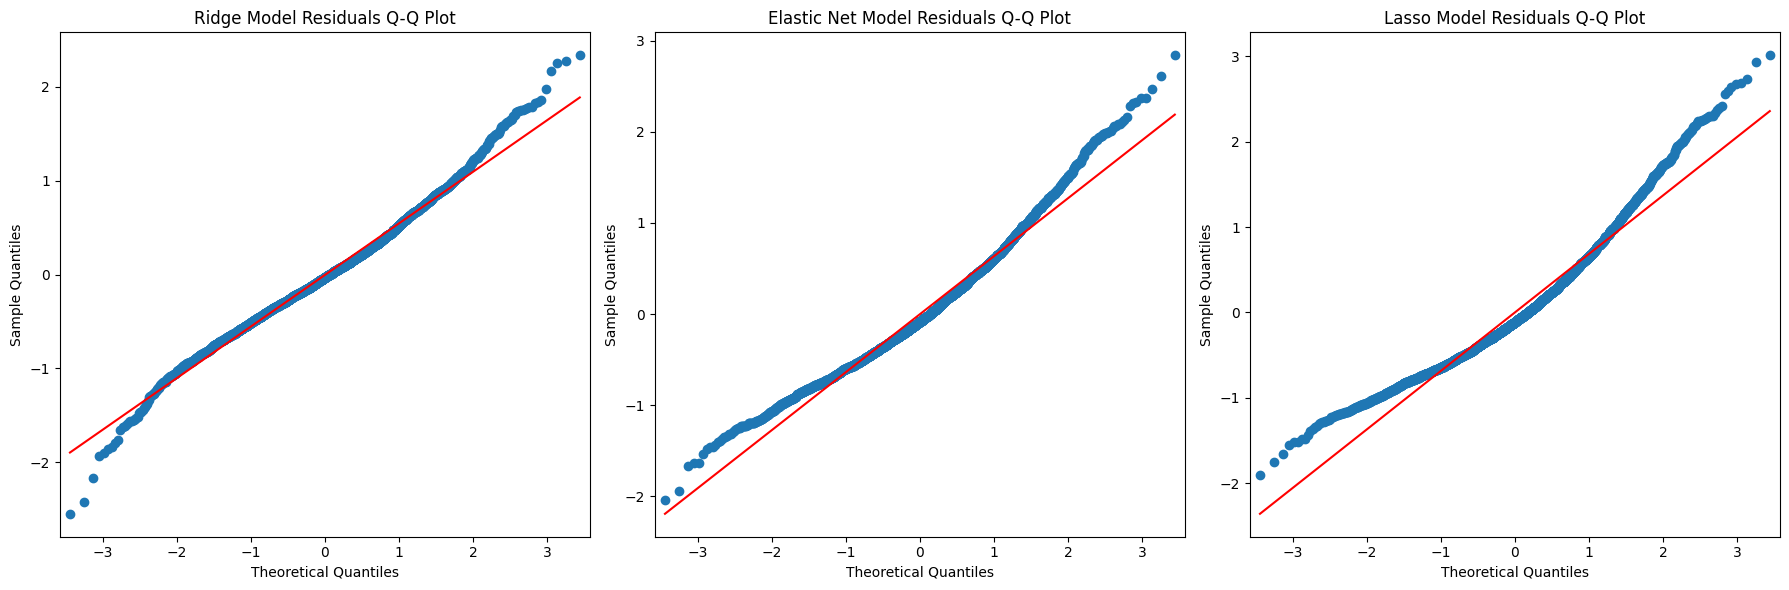

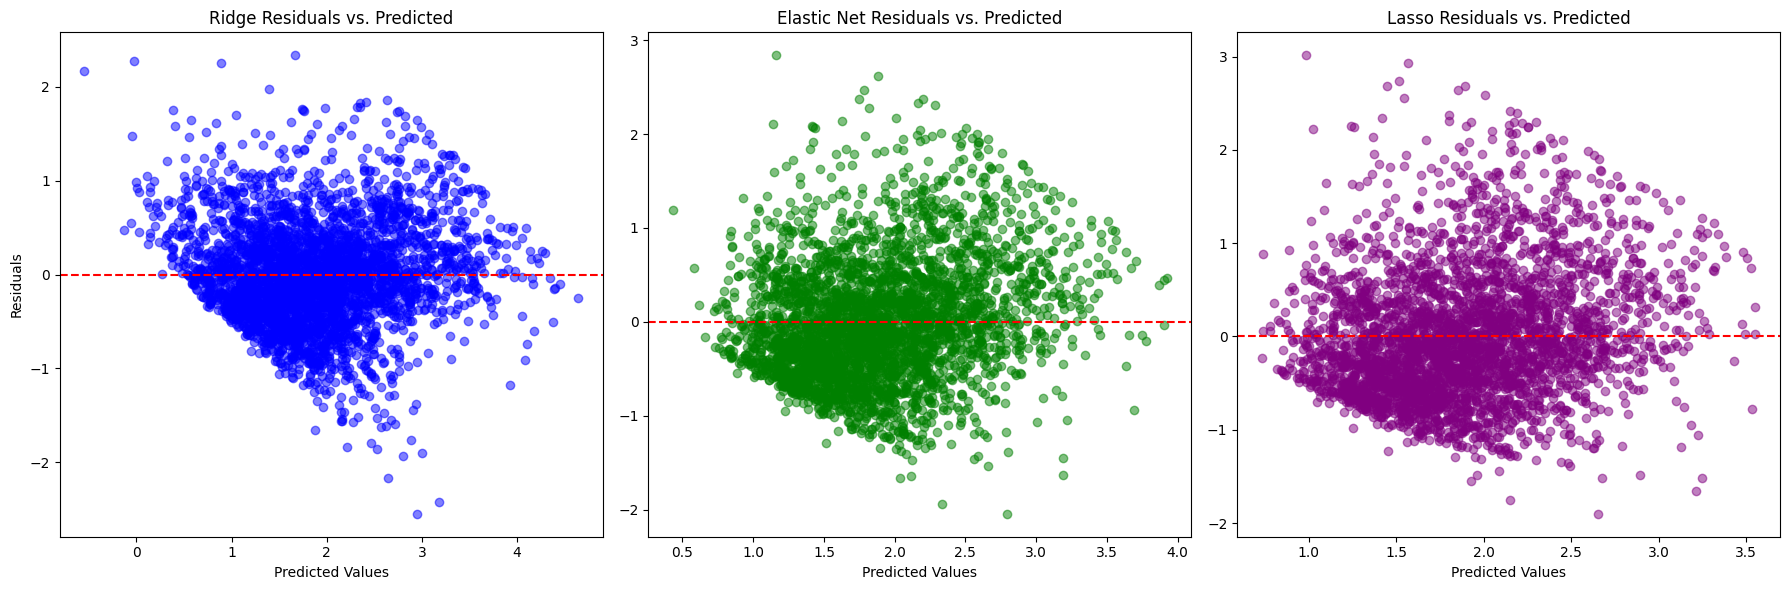

In [182]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

# Assuming data has already been loaded, outliers removed, and models trained as previously described

# Initialize and fit models (assuming the standardized training data and trained models are available)
# Note: Insert the relevant model training code here if not done previously in the session

# Predictions (assuming prediction data is already stored in variables)
# ridge_pred, elastic_net_pred, lasso_pred are already computed

# Calculate residuals
ridge_residuals = y_test - ridge_pred
elastic_net_residuals = y_test - elastic_net_pred
lasso_residuals = y_test - lasso_pred

# Q-Q Plots for residuals
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Ridge Residuals Q-Q Plot
sm.qqplot(ridge_residuals, line='s', ax=axes[0])
axes[0].set_title('Ridge Model Residuals Q-Q Plot')
axes[0].set_xlabel('Theoretical Quantiles')
axes[0].set_ylabel('Sample Quantiles')

# Elastic Net Residuals Q-Q Plot
sm.qqplot(elastic_net_residuals, line='s', ax=axes[1])
axes[1].set_title('Elastic Net Model Residuals Q-Q Plot')
axes[1].set_xlabel('Theoretical Quantiles')

# Lasso Residuals Q-Q Plot
sm.qqplot(lasso_residuals, line='s', ax=axes[2])
axes[2].set_title('Lasso Model Residuals Q-Q Plot')
axes[2].set_xlabel('Theoretical Quantiles')

plt.tight_layout()
plt.show()

# Plotting residuals vs. predicted values
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.scatter(ridge_pred, ridge_residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Ridge Residuals vs. Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.subplot(1, 3, 2)
plt.scatter(elastic_net_pred, elastic_net_residuals, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Elastic Net Residuals vs. Predicted')
plt.xlabel('Predicted Values')

plt.subplot(1, 3, 3)
plt.scatter(lasso_pred, lasso_residuals, color='purple', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Lasso Residuals vs. Predicted')
plt.xlabel('Predicted Values')

plt.tight_layout()
plt.show()


In [180]:
import pandas as pd

# Data to create DataFrame
data = {
    'Model': ['Ridge', 'Elastic Net', 'Lasso'],
    'MSE': [0.4051761054234617, 0.5159861577233052, 0.584411655945056]
}

# Creating DataFrame
mse_results = pd.DataFrame(data)

# Display the DataFrame
mse_results


,Model,MSE
0,Ridge,0.405176
1,Elastic Net,0.515986
2,Lasso,0.584412


In [192]:
import pandas as pd

# Data preparation
data = {
    'Condition': ['No Outliers', 'Log Transformed', 'Standard'],
    'Ridge MSE': [
        0.3016179221213043,  # Ridge MSE (no outliers)
        0.9671839262931796,  # Ridge MSE (log-transformed)
        0.405176             # Ridge MSE (standard)
    ],
    'Elastic Net MSE': [
        0.40429202369576867, # Elastic Net MSE (no outliers)
        0.8828325311847981,  # Elastic Net MSE (log-transformed)
        0.515986             # Elastic Net MSE (standard)
    ],
    'Lasso MSE': [
        0.4692949683224221,  # Lasso MSE (no outliers)
        0.8577958368556886,  # Lasso MSE (log-transformed)
        0.584412             # Lasso MSE (standard)
    ],
    'Decision Tree MSE': [
        0.2457,  # Decision Tree MSE (no outliers)
        0.9045,  # Decision Tree MSE (log-transformed)
        0.354    # Decision Tree MSE (standard)
    ]
}

# Creating the DataFrame
mse_summary_df = pd.DataFrame(data)

# Setting 'Condition' as index for better readability
mse_summary_df.set_index('Condition', inplace=True)

# Display the DataFrame to ensure it's organized nicely
mse_summary_df


,Ridge MSE,Elastic Net MSE,Lasso MSE,Decision Tree MSE
Condition,,,,
No Outliers,0.301618,0.404292,0.469295,0.2457
Log Transformed,0.967184,0.882833,0.857796,0.9045
Standard,0.405176,0.515986,0.584412,0.3540


Percentage of records removed: 15.45%
Records kept: 17451


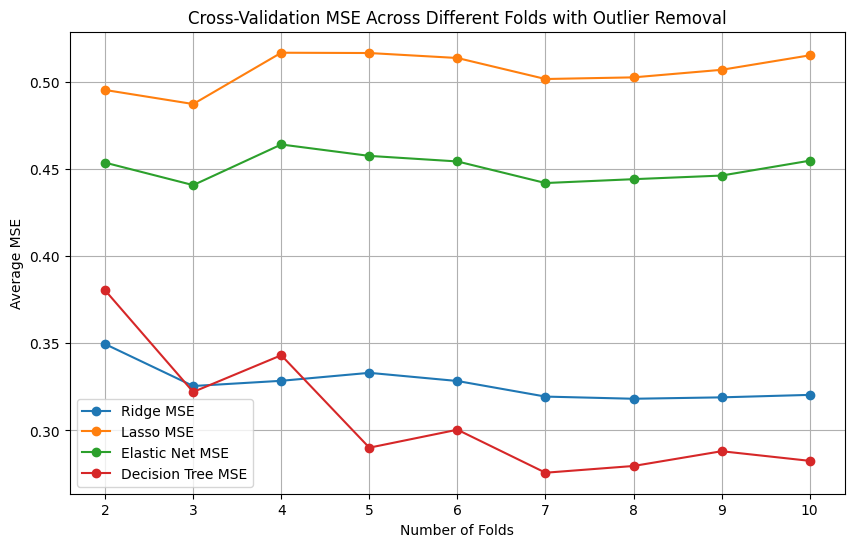

In [188]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer, mean_squared_error

# Load and prepare the dataset
X = California_dataset.drop('Price', axis=1)
y = California_dataset['Price']

# Combining into a single DataFrame for easier outlier management
data = pd.concat([X, y], axis=1)

# Identifying outliers using IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
filter = ~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)
data_clean = data[filter]

# Calculate percentage of data removed
percentage_removed = 100 * (1 - len(data_clean) / len(data))

print(f"Percentage of records removed: {percentage_removed:.2f}%")
print(f"Records kept: {len(data_clean)}")

# Separating features and target variable after outlier removal
X_clean = data_clean.drop('Price', axis=1)
y_clean = data_clean['Price']

# Define models
ridge_model = Ridge(alpha=0.1)
lasso_model = Lasso(alpha=0.1)
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
decision_tree_model = DecisionTreeRegressor(max_depth=5)  # Decision Tree with controlled depth

# MSE scorer
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Number of folds
folds = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# Store average MSEs for each model
ridge_mses = []
lasso_mses = []
elastic_net_mses = []
dt_mses = []  # Store MSEs for Decision Tree Regression

# Calculate MSEs for each fold count using the clean data
for cv in folds:
    ridge_pipeline = make_pipeline(StandardScaler(), ridge_model)
    lasso_pipeline = make_pipeline(StandardScaler(), lasso_model)
    elastic_net_pipeline = make_pipeline(StandardScaler(), elastic_net_model)
    dt_pipeline = make_pipeline(StandardScaler(), decision_tree_model)  # Decision Tree pipeline

    # Perform cross-validation
    ridge_score = cross_val_score(ridge_pipeline, X_clean, y_clean, cv=cv, scoring=mse_scorer)
    lasso_score = cross_val_score(lasso_pipeline, X_clean, y_clean, cv=cv, scoring=mse_scorer)
    elastic_net_score = cross_val_score(elastic_net_pipeline, X_clean, y_clean, cv=cv, scoring=mse_scorer)
    dt_score = cross_val_score(dt_pipeline, X_clean, y_clean, cv=cv, scoring=mse_scorer)  # Decision Tree scoring

    # Append averaged negative scores (converted to positive)
    ridge_mses.append(-np.mean(ridge_score))
    lasso_mses.append(-np.mean(lasso_score))
    elastic_net_mses.append(-np.mean(elastic_net_score))
    dt_mses.append(-np.mean(dt_score))  # Append Decision Tree MSE

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(folds, ridge_mses, marker='o', label='Ridge MSE')
plt.plot(folds, lasso_mses, marker='o', label='Lasso MSE')
plt.plot(folds, elastic_net_mses, marker='o', label='Elastic Net MSE')
plt.plot(folds, dt_mses, marker='o', label='Decision Tree MSE')  # Plot Decision Tree MSE

plt.title('Cross-Validation MSE Across Different Folds with Outlier Removal')
plt.xlabel('Number of Folds')
plt.ylabel('Average MSE')
plt.legend()
plt.grid(True)
plt.show()


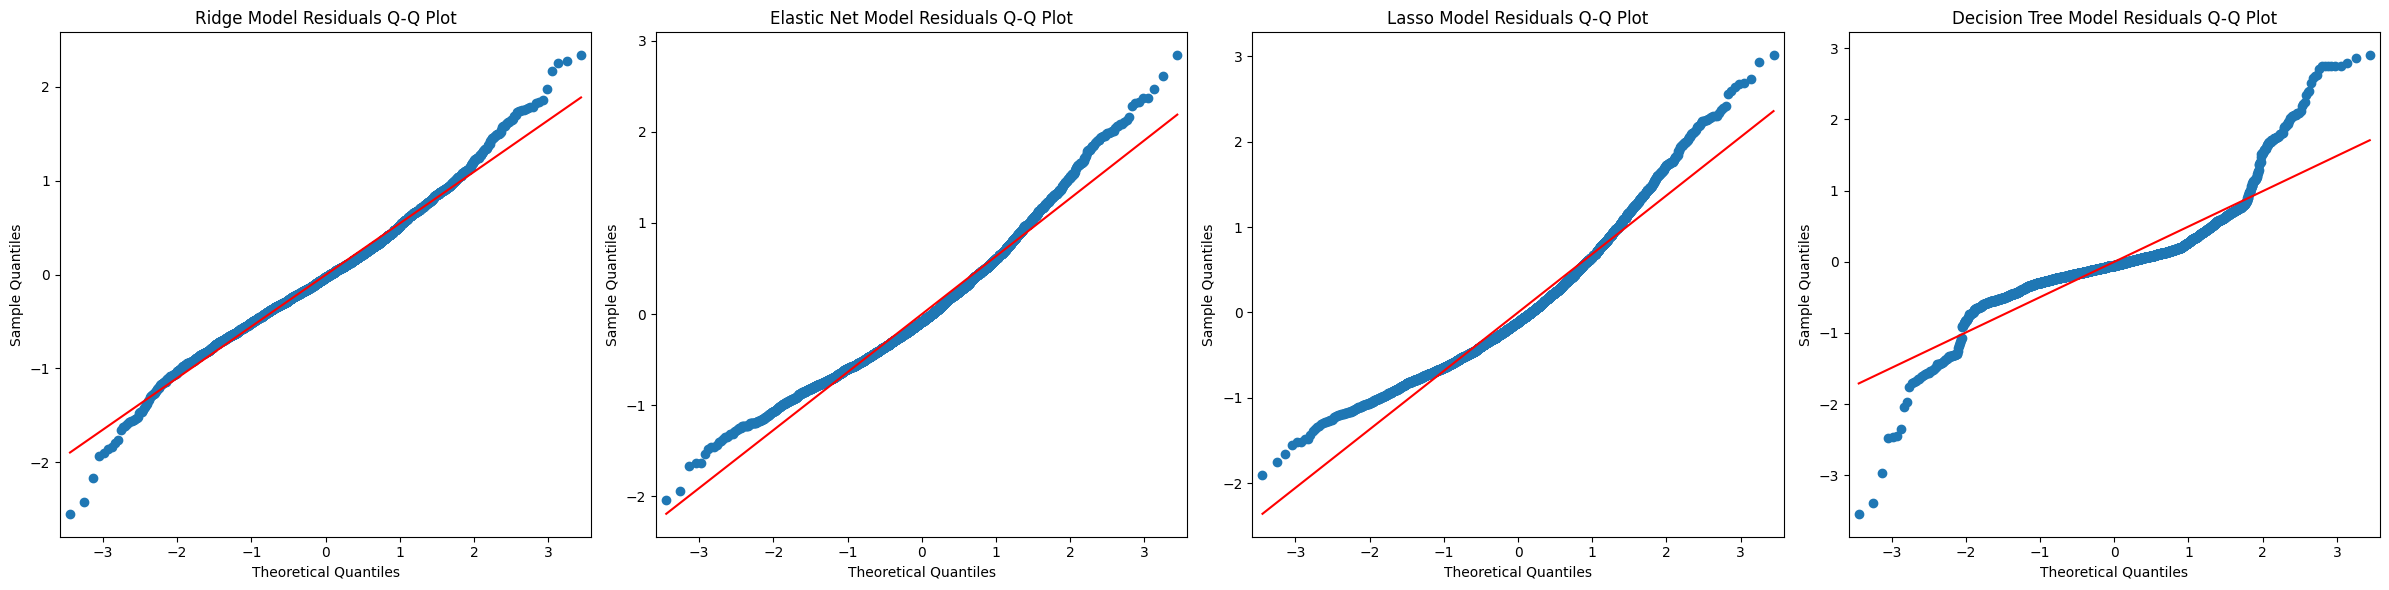

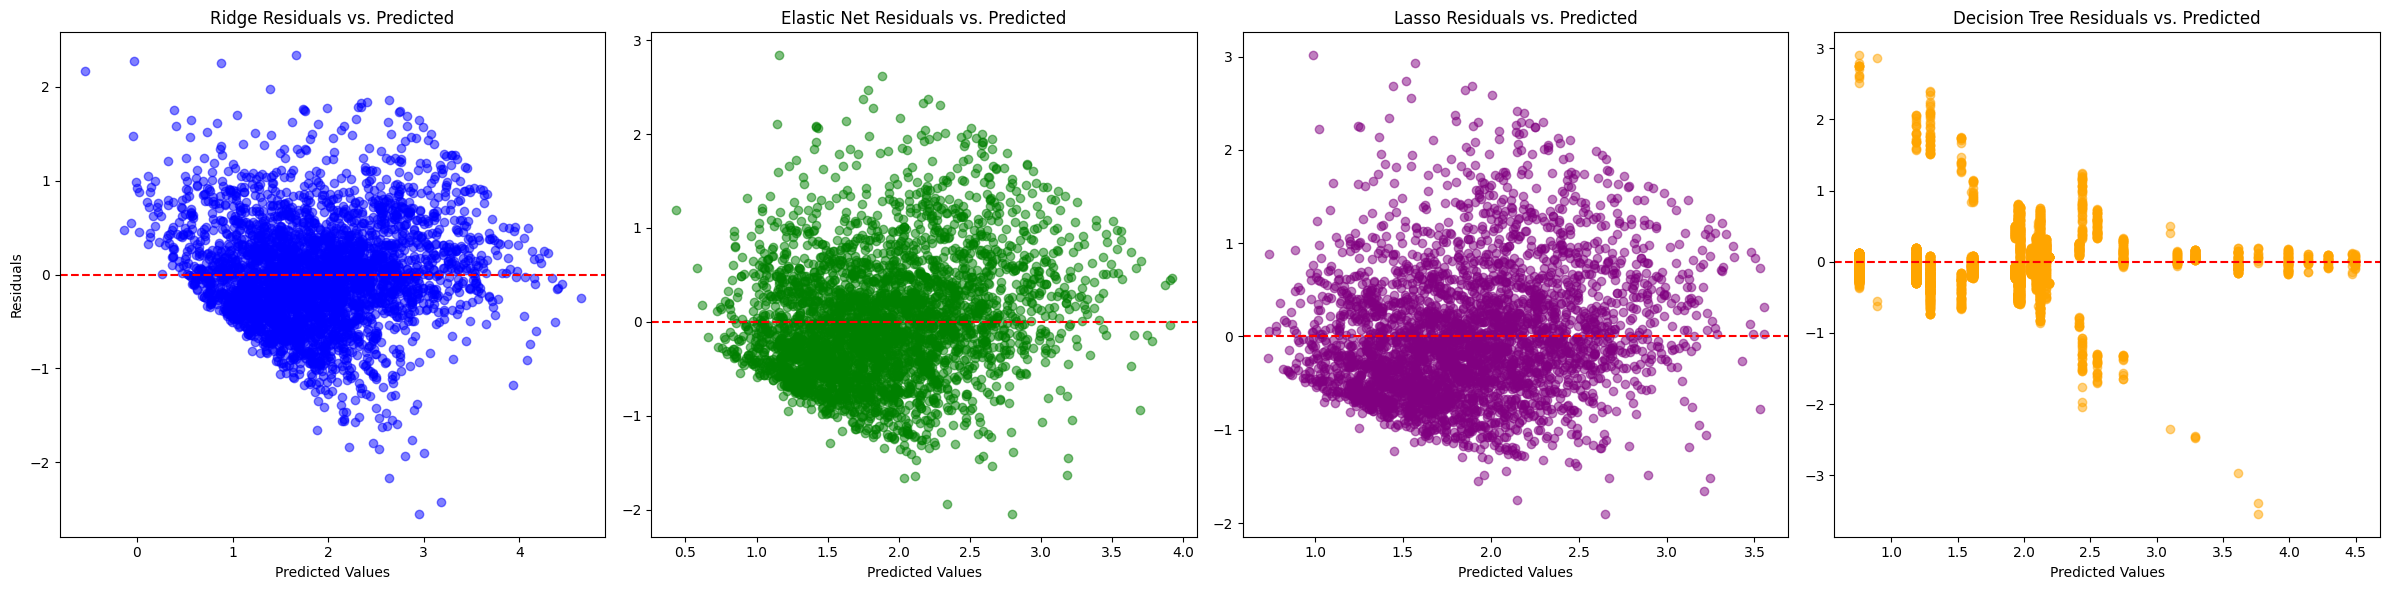

In [189]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Assuming the dataset 'California_dataset' has already been loaded and preprocessed

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
ridge_model = Ridge(alpha=0.1)
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
lasso_model = Lasso(alpha=0.1)
decision_tree_model = DecisionTreeRegressor(max_depth=5)  # Controlled depth to prevent overfitting

# Fit models
ridge_model.fit(X_train_scaled, y_train)
elastic_net_model.fit(X_train_scaled, y_train)
lasso_model.fit(X_train_scaled, y_train)
decision_tree_model.fit(X_train_scaled, y_train)

# Make predictions
ridge_pred = ridge_model.predict(X_test_scaled)
elastic_net_pred = elastic_net_model.predict(X_test_scaled)
lasso_pred = lasso_model.predict(X_test_scaled)
dt_pred = decision_tree_model.predict(X_test_scaled)

# Calculate residuals
ridge_residuals = y_test - ridge_pred
elastic_net_residuals = y_test - elastic_net_pred
lasso_residuals = y_test - lasso_pred
dt_residuals = y_test - dt_pred

# Q-Q Plots for residuals
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

# Ridge Residuals Q-Q Plot
sm.qqplot(ridge_residuals, line='s', ax=axes[0])
axes[0].set_title('Ridge Model Residuals Q-Q Plot')
axes[0].set_xlabel('Theoretical Quantiles')
axes[0].set_ylabel('Sample Quantiles')

# Elastic Net Residuals Q-Q Plot
sm.qqplot(elastic_net_residuals, line='s', ax=axes[1])
axes[1].set_title('Elastic Net Model Residuals Q-Q Plot')
axes[1].set_xlabel('Theoretical Quantiles')

# Lasso Residuals Q-Q Plot
sm.qqplot(lasso_residuals, line='s', ax=axes[2])
axes[2].set_title('Lasso Model Residuals Q-Q Plot')
axes[2].set_xlabel('Theoretical Quantiles')

# Decision Tree Residuals Q-Q Plot
sm.qqplot(dt_residuals, line='s', ax=axes[3])
axes[3].set_title('Decision Tree Model Residuals Q-Q Plot')
axes[3].set_xlabel('Theoretical Quantiles')

plt.tight_layout()
plt.show()

# Plotting residuals vs. predicted values
plt.figure(figsize=(24, 6))
plt.subplot(1, 4, 1)
plt.scatter(ridge_pred, ridge_residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Ridge Residuals vs. Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.subplot(1, 4, 2)
plt.scatter(elastic_net_pred, elastic_net_residuals, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Elastic Net Residuals vs. Predicted')
plt.xlabel('Predicted Values')

plt.subplot(1, 4, 3)
plt.scatter(lasso_pred, lasso_residuals, color='purple', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Lasso Residuals vs. Predicted')
plt.xlabel('Predicted Values')

plt.subplot(1, 4, 4)
plt.scatter(dt_pred, dt_residuals, color='orange', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Decision Tree Residuals vs. Predicted')
plt.xlabel('Predicted Values')

plt.tight_layout()
plt.show()


In [190]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Predictions (assuming prediction data is already stored in variables)
# ridge_pred, elastic_net_pred, lasso_pred, dt_pred are the predicted values for the test set

# Calculate MSE for each model
ridge_mse = mean_squared_error(y_test, ridge_pred)
elastic_net_mse = mean_squared_error(y_test, elastic_net_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)
dt_mse = mean_squared_error(y_test, dt_pred)

# Print MSE results
print(f"Ridge MSE: {ridge_mse:.4f}")
print(f"Elastic Net MSE: {elastic_net_mse:.4f}")
print(f"Lasso MSE: {lasso_mse:.4f}")
print(f"Decision Tree MSE: {dt_mse:.4f}")


Ridge MSE: 0.3016
Elastic Net MSE: 0.4043
Lasso MSE: 0.4693
Decision Tree MSE: 0.2457
